<a href="https://colab.research.google.com/github/EDC21/Deep-Learning/blob/master/Coursera-Tensorflow%20Developer/Chapter1-Intro%20to%20DL/Week%204/Week_4_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using Real-world Images

##4.2 Understanding Image Generator

One limitation of our previous work is that we used datasets of very uniform images. Image of clothing that was staged and framed in 28x28. But what happens when you use larger images and where the feature might be in different locations?

For example, how about these images of horses and humans? They have different sizes and different aspect ratios. The subject can be in different locations. In some cases, there may even be multiple subjects. In addition to that, the earlier examples with a fashion data used a built-in dataset. All of the data was handily split into training and test sets for you and labels were available. In many scenarios, that's not going to be the case and you'll have to do it for yourself. So in this lesson, we'll take a look at some of the APIs that are available to make that easier for you. In particular, the image generator in TensorFlow.

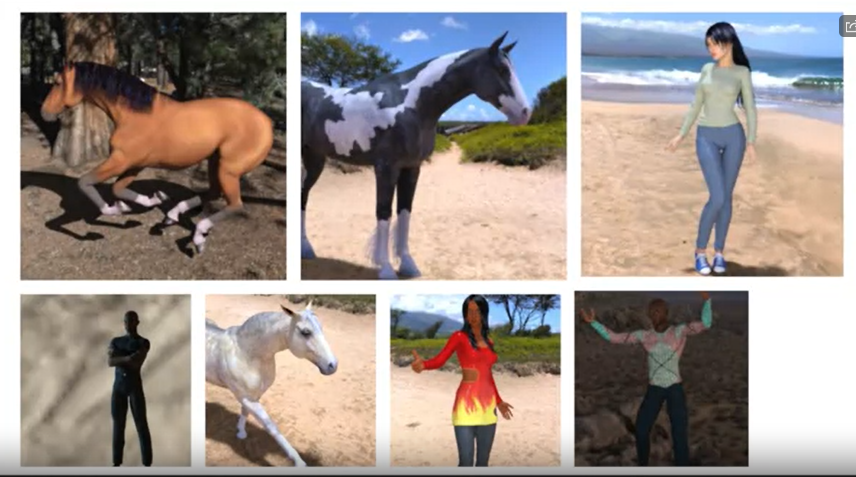

One feature of the image generator is that you can point it at a directory and then the sub-directories of that will automatically generate labels for you. So for example, consider this directory structure. You have an images directory and in that, you have sub-directories for training and validation. When you put sub-directories in these for horses and humans and store the requisite images in there, the image generator can create a feeder for those images and auto label them for you. So for example, if I point an image generator at the training directory, the labels will be horses and humans and all of the images in each directory will be loaded and labeled accordingly. Similarly, if I point one at the validation directory, the same thing will happen. So let's take a look at this in code. The image generator class is available in Keras.preprocessing.image. You can then instantiate an image generator like this. I

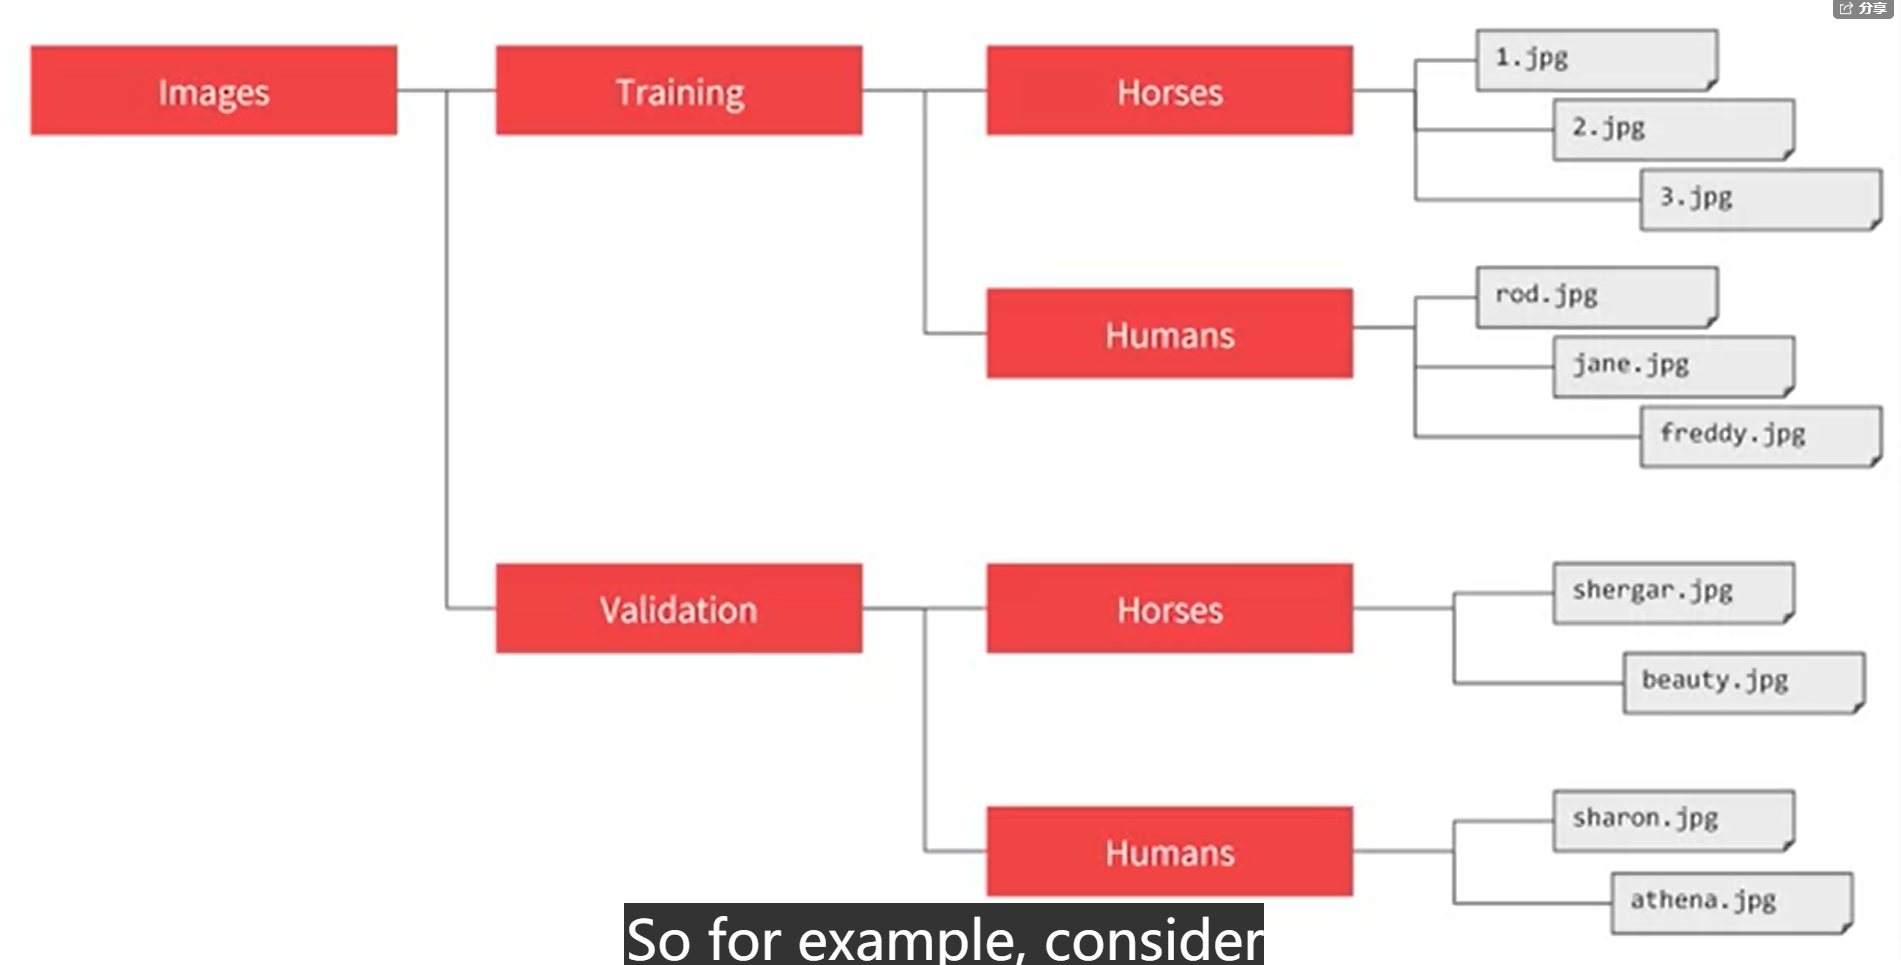

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, #we need to define
    target_size=(300,300), #the images are resized
    batch_size=128,
    class_mode='binary'
)

NameError: ignored

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(300,300), 
    batch_size=128,
    class_mode='binary'
)

##Defining a ConvNet to use complex images

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16,(3,3),activation='relu',
           input_shape=(300,300,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')

])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

##4.4 Training the ConvNet with fit_generator

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
       optimizer=RMSprop(lr=0.001),
       metrics=['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=8, #there are 256 pictures and we want the batch_size is 32, so we need 8 steps.
    verbose=2
)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np,expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

##4.5 Walking through developing a ConvNet

##4.6 Walking through training the ConvNet with fit_generator

Full Project:[連結文字](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%202%20-%20Notebook.ipynb#scrollTo=Fb1_lgobv81m)

##4.7 Adding automatic validation to test accuracy

Full Project:[連結文字](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%203%20-%20Notebook.ipynb#scrollTo=PixZ2s5QbYQ3)

##4.7 Exploring the impact of compressing images

Full Project:[連結文字](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%204%20-%20Notebook.ipynb)